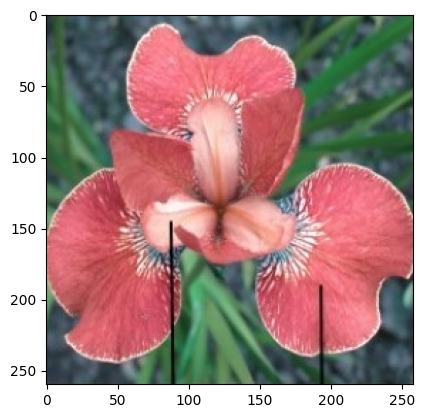

In [1]:
import cv2
import matplotlib.pyplot as plt
# Load an image from file
image_path = 'image.jpg'
image = cv2.imread(image_path)

# Display the image
plt.imshow(image)

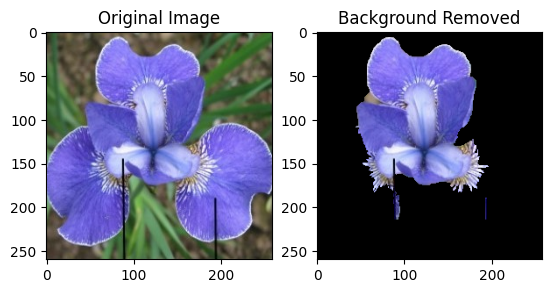

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load an image from file
image_path = 'image.jpg'
image = cv2.imread(image_path)

# Create a mask initialized with zeros
mask = np.zeros(image.shape[:2], np.uint8)

# Define the rectangle around the object (you may need to adjust this manually)
rect = (5, 5, image.shape[1]-50, image.shape[0]-50)

# Initialize the background and foreground models for GrabCut
bgd_model = np.zeros((1, 65), np.float64)
fgd_model = np.zeros((1, 65), np.float64)

# Apply GrabCut algorithm
cv2.grabCut(image, mask, rect, bgd_model, fgd_model, 5, cv2.GC_INIT_WITH_RECT)

# Modify the mask to create a binary mask (2 and 0 are considered background, others are foreground)
mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')

# Multiply the original image with the binary mask to remove the background
result = image * mask2[:, :, np.newaxis]

# Display the original image and the result
plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title('Original Image')
plt.subplot(122), plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB)), plt.title('Background Removed')
plt.show()


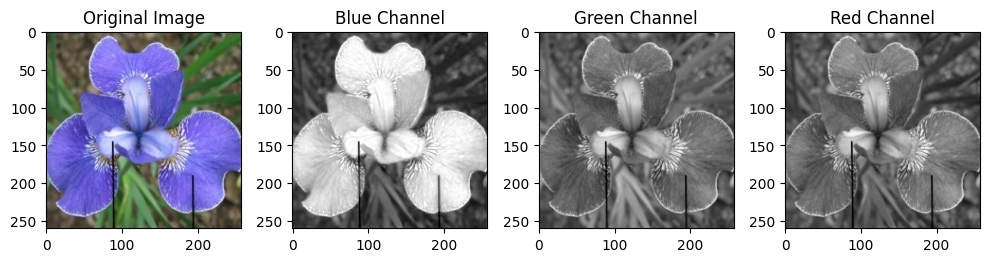

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load an image from file
image_path = 'image.jpg'
image = cv2.imread(image_path)

# Split the image into RGB channels
blue_channel, green_channel, red_channel = cv2.split(image)

# Display the original image and the separated RGB channels using plt
plt.figure(figsize=(10, 4))

plt.subplot(141)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(142)
plt.imshow(blue_channel, cmap='gray')
plt.title('Blue Channel')

plt.subplot(143)
plt.imshow(green_channel, cmap='gray')
plt.title('Green Channel')

plt.subplot(144)
plt.imshow(red_channel, cmap='gray')
plt.title('Red Channel')

plt.tight_layout()
plt.show()


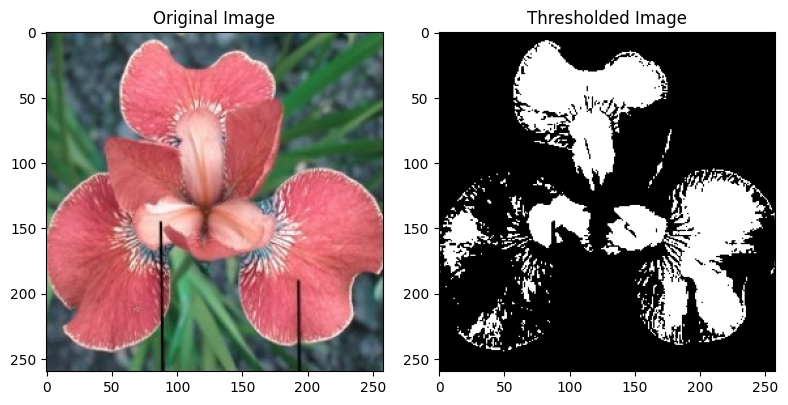

In [4]:


# Apply thresholding
_, thresholded_image = cv2.threshold(blue_channel, 220, 220, cv2.THRESH_BINARY)

# Display the original and thresholded images
plt.figure(figsize=(8, 4))

plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(122)
plt.imshow(thresholded_image, cmap='gray')
plt.title('Thresholded Image')

plt.tight_layout()
plt.show()


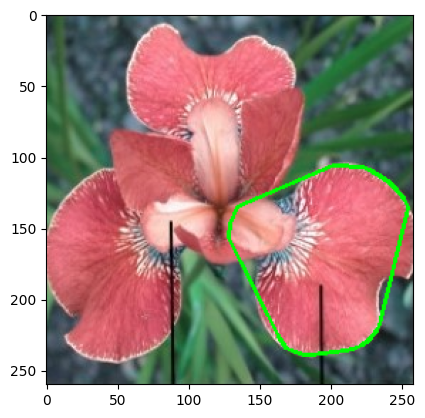

In [5]:


# Find contours in the binary image
contours, _ = cv2.findContours(thresholded_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Find the contour with the maximum area (assumed to be the hand)
max_contour = max(contours, key=cv2.contourArea)

# Find the convex hull of the contour
hull = cv2.convexHull(max_contour)

# Draw the convex hull on the original image
result_image = image.copy()
cv2.drawContours(result_image, [hull], -1, (0, 255, 0), 2)  # -1 indicates drawing all contours in the list

# Display the original image and the resu
plt.imshow( result_image)



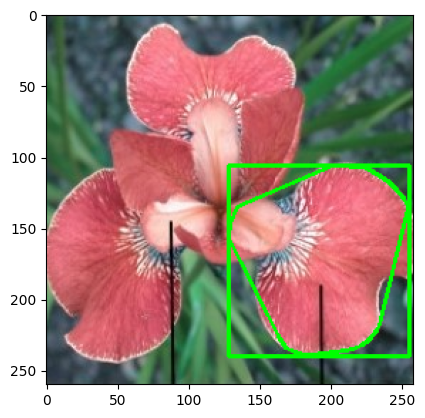


 Bounding Rectangle Dimensions - Height: 134, Width: 127


In [6]:
# Find contours in the binary image
contours, _ = cv2.findContours(thresholded_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Find the contour with the maximum area (assumed to be the hand)
max_contour = max(contours, key=cv2.contourArea)

# Find the convex hull of the contour
hull = cv2.convexHull(max_contour)

# Find the bounding rectangle around the convex hull
x, y, w, h = cv2.boundingRect(hull)


cv2.drawContours(result_image, [hull], -1, (0, 255, 0), 2)  # -1 indicates drawing all contours in the list
cv2.rectangle(result_image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display the original image and the result
plt.imshow(result_image)
plt.show()

# Print the dimensions
print(f"\n Bounding Rectangle Dimensions - Height: {h}, Width: {w}")


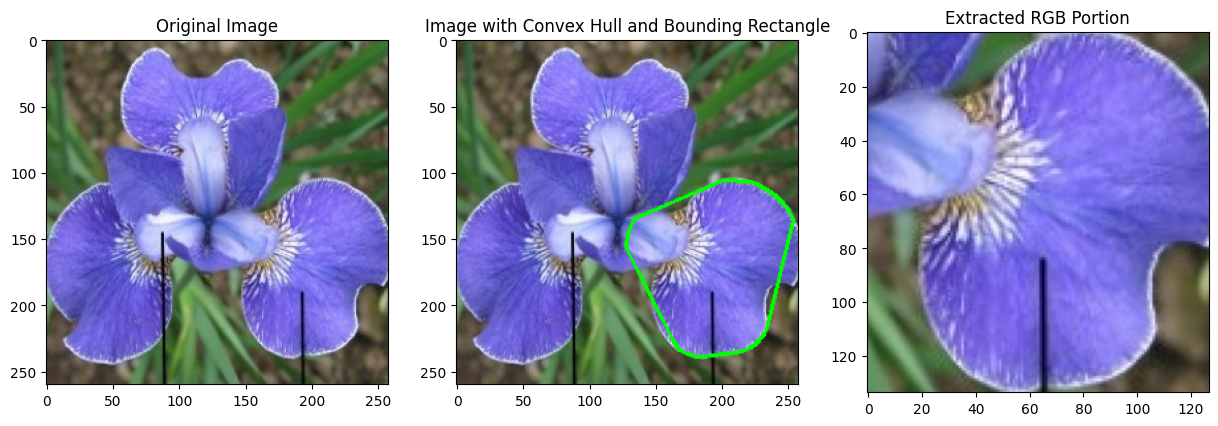

In [7]:


# Extract the RGB portion of the image under the convex hull
rgb_portion = image[y:y+h, x:x+w]


# Draw the convex hull and bounding rectangle on the original image
result_image = image.copy()
cv2.drawContours(result_image, [hull], -1, (0, 255, 0), 2)  # -1 indicates drawing all contours in the list

plt.figure(figsize=(15,5))
# Display the original image, the image with the convex hull, and the extracted RGB portion
plt.subplot(131)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(132)
plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
plt.title('Image with Convex Hull and Bounding Rectangle')

plt.subplot(133)
plt.imshow(cv2.cvtColor(rgb_portion, cv2.COLOR_BGR2RGB))
plt.title('Extracted RGB Portion')

plt.show()


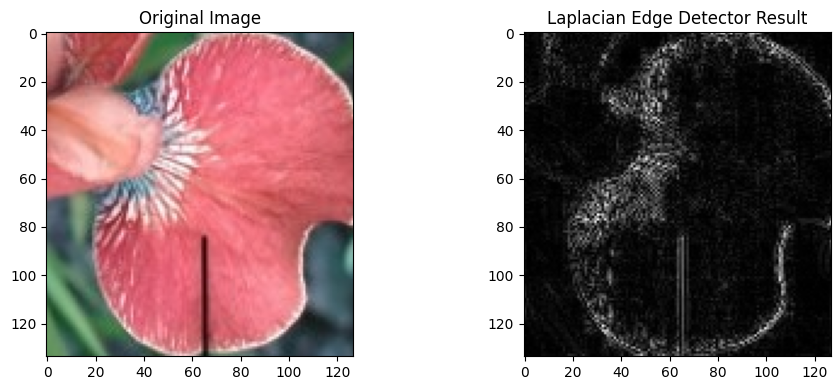

In [8]:
image = rgb_portion
gray_image = cv2.cvtColor(rgb_portion, cv2.COLOR_BGR2GRAY)
# Apply Laplacian edge detector
laplacian = cv2.Laplacian(gray_image, cv2.CV_64F)

# Convert the result to uint8 (required for displaying with Matplotlib)
laplacian = cv2.convertScaleAbs(laplacian)

# Display the original image and the Laplacian result
plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.imshow(rgb_portion, cmap='gray')
plt.title('Original Image')

plt.subplot(122)
plt.imshow(laplacian, cmap='gray')
plt.title('Laplacian Edge Detector Result')

plt.tight_layout()
plt.show()

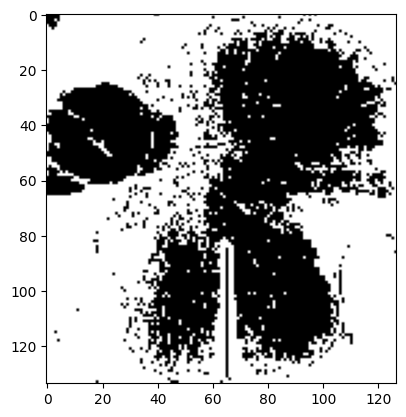

In [9]:
r,g,b=cv2.split(cv2.cvtColor(rgb_portion, cv2.COLOR_BGR2RGB))
i=laplacian-b
_, thresholded_image = cv2.threshold(i, 50, 60, cv2.THRESH_BINARY)
plt.imshow(thresholded_image,cmap='gray')

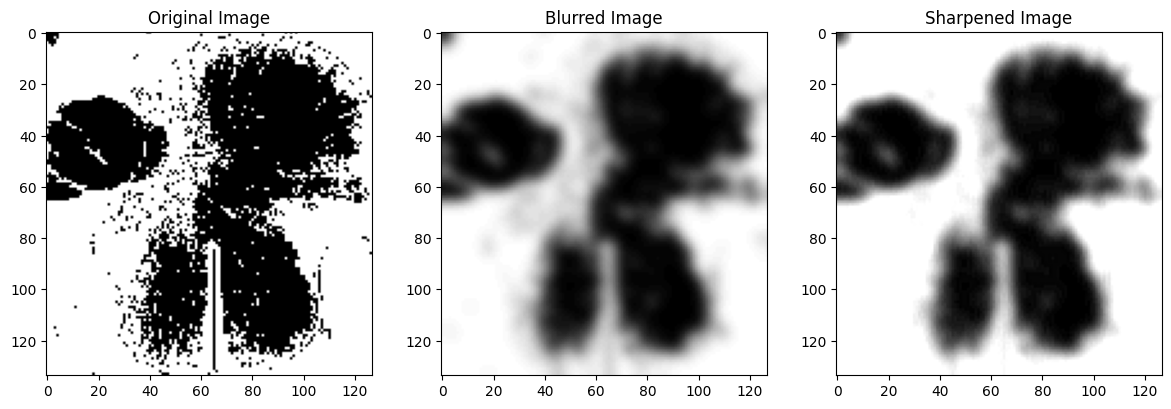

In [10]:
blurred_image = cv2.GaussianBlur(thresholded_image, (15, 15), 0)  # You can adjust the kernel size (15, 15) based on your preference

# Sharpen the blurred image
sharpening_filter = np.array([[-1, 1, -1],
                              [-1, 9, -1],
                              [-1, 1, -1]])
sharpened_image = cv2.filter2D(blurred_image, -1, sharpening_filter)

# Display the original image, blurred image, and sharpened image
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.imshow(thresholded_image,cmap='gray')
plt.title('Original Image')

plt.subplot(132)
plt.imshow(blurred_image,cmap='gray')
plt.title('Blurred Image')

plt.subplot(133)
plt.imshow(sharpened_image,cmap='gray')
plt.title('Sharpened Image')

plt.tight_layout()
plt.show()

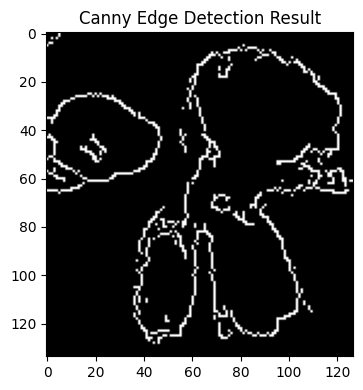

In [11]:


# Apply Canny edge detector
edges = cv2.Canny(sharpened_image, 100, 150)  # Adjust the threshold values based on your image

# Display the original image and the edges
plt.figure(figsize=(10, 4))



plt.subplot(122)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection Result')

plt.tight_layout()
plt.show()


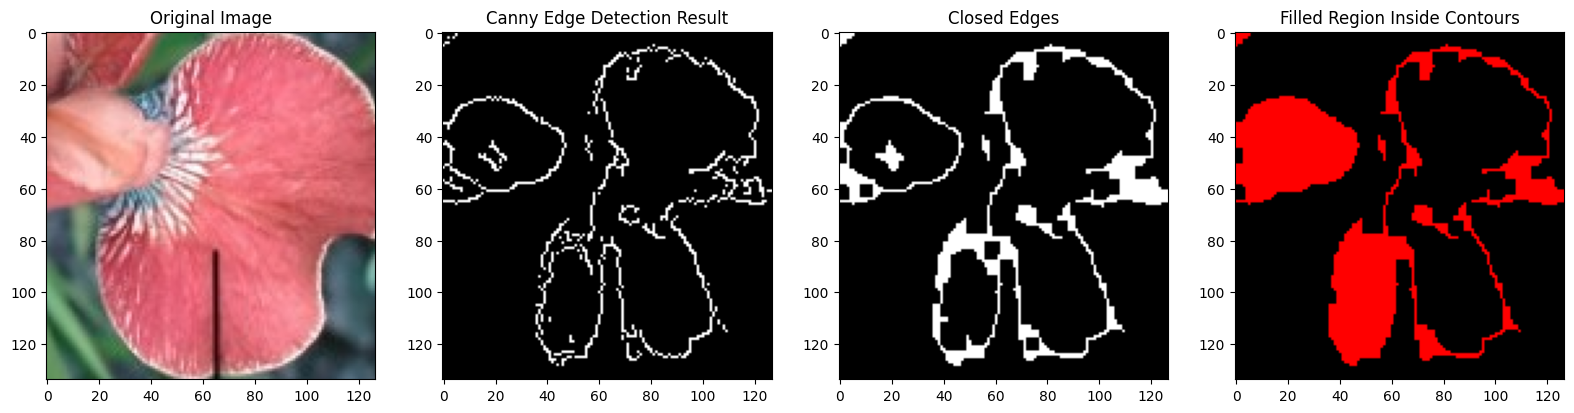

In [12]:



# Apply morphological operations to close gaps in contours
kernel = np.ones((5, 5), np.uint8)
closed_edges = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)

# Find contours in the closed edges
contours, _ = cv2.findContours(closed_edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a blank image to draw the contours
contour_image = np.zeros_like(image)

# Draw contours on the blank image (filled)
cv2.drawContours(contour_image, contours, -1, 255, thickness=cv2.FILLED)

# Display the original image, Canny edges, closed edges, and filled region
plt.figure(figsize=(16, 4))

plt.subplot(141)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(142)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection Result')

plt.subplot(143)
plt.imshow(closed_edges, cmap='gray')
plt.title('Closed Edges')

plt.subplot(144)
plt.imshow(contour_image, cmap='gray')
plt.title('Filled Region Inside Contours')

plt.tight_layout()
plt.show()


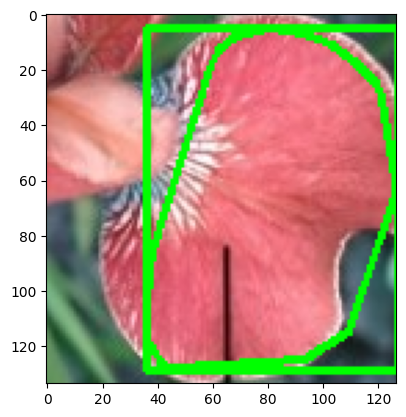


 Bounding Rectangle Dimensions - Height: 124, Width: 91


In [13]:
# Find contours in the binary image
contours, _ = cv2.findContours(closed_edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Find the contour with the maximum area (assumed to be the hand)
max_contour = max(contours, key=cv2.contourArea)

# Find the convex hull of the contour
hull = cv2.convexHull(max_contour)

# Find the bounding rectangle around the convex hull
x, y, w, h = cv2.boundingRect(hull)


cv2.drawContours(rgb_portion, [hull], -1, (0, 255, 0), 2)  # -1 indicates drawing all contours in the list
cv2.rectangle(rgb_portion, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display the original image and the result
plt.imshow(rgb_portion)
plt.show()

# Print the dimensions
print(f"\n Bounding Rectangle Dimensions - Height: {h}, Width: {w}")


In [14]:
bda vla  image ka dimensions - chota vla image ka dimensions = sepal dimensions

SyntaxError: invalid syntax (2376607231.py, line 1)